In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import csv

In [ ]:
df = pd.read_csv('Dados_Estatisticos (1).csv', on_bad_lines='skip', header=0, delimiter=';')

In [ ]:
print(df.columns)

Index(['EMPRESA_SIGLA', 'EMPRESA_NOME', 'EMPRESA_NACIONALIDADE', 'ANO', 'MES',
       'AEROPORTO_DE_ORIGEM_SIGLA', 'AEROPORTO_DE_ORIGEM_NOME',
       'AEROPORTO_DE_ORIGEM_UF', 'AEROPORTO_DE_ORIGEM_REGIAO',
       'AEROPORTO_DE_ORIGEM_PAIS', 'AEROPORTO_DE_ORIGEM_CONTINENTE',
       'AEROPORTO_DE_DESTINO_SIGLA', 'AEROPORTO_DE_DESTINO_NOME',
       'AEROPORTO_DE_DESTINO_UF', 'AEROPORTO_DE_DESTINO_REGIAO',
       'AEROPORTO_DE_DESTINO_PAIS', 'AEROPORTO_DE_DESTINO_CONTINENTE',
       'NATUREZA', 'GRUPO_DE_VOO', 'PASSAGEIROS_PAGOS', 'PASSAGEIROS_GRATIS',
       'CARGA_PAGA_KG', 'CARGA_GRATIS_KG', 'CORREIO_KG', 'ASK', 'RPK', 'ATK',
       'RTK', 'COMBUSTIVEL_LITROS', 'DISTANCIA_VOADA_KM', 'DECOLAGENS',
       'CARGA_PAGA_KM', 'CARGA_GRATIS_KM', 'CORREIO_KM', 'ASSENTOS', 'PAYLOAD',
       'HORAS_VOADAS', 'BAGAGEM_KG'],
      dtype='object')


In [ ]:
print(df)

      EMPRESA_SIGLA                                       EMPRESA_NOME  \
0               1ED   SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S   
1               1ED   SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S   
2               1ED   SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S   
3               1ED   SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S   
4               1ED   SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S   
...             ...                                                ...   
79408           VCV  CONSORCIO VENEZOLANO DE INDUSTRIAS AERONAUTICA...   
79409           VCV  CONSORCIO VENEZOLANO DE INDUSTRIAS AERONAUTICA...   
79410           VCV  CONSORCIO VENEZOLANO DE INDUSTRIAS AERONAUTICA...   
79411           VCV  CONSORCIO VENEZOLANO DE INDUSTRIAS AERONAUTICA...   
79412           VCV  CONSORCIO VENEZOLANO DE INDUSTRIAS AERONAUTICA...   

      EMPRESA_NACIONALIDADE   ANO  MES AEROPORTO_DE_ORIGEM_SIGLA  \
0               ESTRANGEIRA  2023    8     

In [ ]:
print(df['ANO'].dtype)
print(df['ANO'].unique())
print(df.head())

int64
[2023 2024]
  EMPRESA_SIGLA                                      EMPRESA_NOME  \
0           1ED  SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S   
1           1ED  SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S   
2           1ED  SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S   
3           1ED  SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S   
4           1ED  SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S   

  EMPRESA_NACIONALIDADE   ANO  MES AEROPORTO_DE_ORIGEM_SIGLA  \
0           ESTRANGEIRA  2023    8                      SBCY   
1           ESTRANGEIRA  2023    8                      SBCY   
2           ESTRANGEIRA  2023    8                      SBEG   
3           ESTRANGEIRA  2023    8                      SBGR   
4           ESTRANGEIRA  2023    8                      SBGR   

  AEROPORTO_DE_ORIGEM_NOME AEROPORTO_DE_ORIGEM_UF AEROPORTO_DE_ORIGEM_REGIAO  \
0            VÁRZEA GRANDE                     MT               CENTRO-OESTE   
1            VÁRZEA GR

In [ ]:
df = df[df['AEROPORTO_DE_ORIGEM_REGIAO'].isin(["SUDESTE"])]
df = df.reset_index(drop=True)

print(df['AEROPORTO_DE_ORIGEM_REGIAO'].unique())

['SUDESTE']


In [ ]:
df = df[df['AEROPORTO_DE_DESTINO_REGIAO'].isin(["SUDESTE"])]
df = df.reset_index(drop=True)

print(df['AEROPORTO_DE_DESTINO_REGIAO'].unique())

['SUDESTE']


In [ ]:
df = df[df['GRUPO_DE_VOO'].isin(['REGULAR'])]

In [ ]:
print(len(df))

4860


In [ ]:
print(df['EMPRESA_NOME'].unique())

['AMERICAN AIRLINES, INC.' 'AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)'
 'SOCIÉTÉ AIR FRANCE' 'AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA'
 'AZUL LINHAS AÉREAS BRASILEIRAS S/A'
 'CARGOLUX AIRLINES INTERNATIONAL S/A' 'DEUTSCHE LUFTHANSA A.G.'
 'GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS S.A.)' 'ATLAS AIR INC'
 'KLM CIA. REAL HOLANDESA DE AVIAÇÃO'
 'LÍNEA AÉREA CARGUEIRA DE COLOMBIA S.A - LANCO'
 'LATAM AIRLINES GROUP (EX - LAN AIRLINES S/A)' 'LAN CARGO S.A.'
 'ABSA - AEROLINHAS BRASILEIRAS S.A.'
 'MODERN TRANSPORTE AEREO DE CARGA S.A'
 'PASSAREDO TRANSPORTES AÉREOS S.A.' 'SWISS INTERNATIONAL AIR LINES LTD.'
 'TAM LINHAS AÉREAS S.A.' 'TURKISH AIRLINES INC' 'TAMPA CARGO S.A.'
 'TOTAL LINHAS AÉREAS S.A.' 'EMIRATES' 'UPS - UNITED PARCEL SERVICE CO.'
 'DELTA AIR LINES INC.' 'LUFTHANSA CARGO AG'
 'IBÉRIA LINEAS AEREAS DE ESPAÑA SOCIEDAD ANONIMA OPERADORA'
 'MARTINAIR HOLLAND N.V.' 'MAP TRANSPORTES AÉREOS LTDA.'
 'SKY AIRLINE S.A.']


In [ ]:
#print(df)

print(df['AEROPORTO_DE_ORIGEM_NOME'].unique())
print(df['AEROPORTO_DE_ORIGEM_SIGLA'].unique())

['RIO DE JANEIRO' 'CONFINS' 'CAMPOS DOS GOYTACAZES' 'JUNDIAÍ' 'MACAÉ'
 'SÃO PAULO' 'VARGINHA' 'GOIANÁ' 'PATOS DE MINAS' 'TEÓFILO OTONI'
 'PARACATU' 'SÃO JOSÉ DO RIO PRETO' 'MONTES CLAROS' 'SÃO JOSÉ DOS CAMPOS'
 'VITÓRIA' 'ARAXÁ' 'CAMPINAS' 'GOVERNADOR VALADARES' 'SANTANA DO PARAÍSO'
 'MANHUAÇU' 'GUARULHOS' 'AREALVA' 'ARAÇATUBA' 'CABO FRIO'
 'PRESIDENTE PRUDENTE' 'MARÍLIA' 'RIBEIRÃO PRETO' 'UBERLÂNDIA' 'UBERABA'
 'BELO HORIZONTE' 'SÃO CARLOS' 'LINHARES' 'SALINAS' 'SOROCABA'
 'BRAGANÇA PAULISTA' 'SÃO JOÃO DA BOA VISTA' 'ARARAQUARA' 'MARICÁ'
 'DIVINÓPOLIS' 'FRANCA' 'BARRETOS']
['SBGL' 'SBCF' 'SBCP' 'SBJD' 'SBJR' 'SBME' 'SBRJ' 'SBSP' 'SBVG' 'SBZM'
 'SNPD' 'SNTO' 'SNZR' 'SBSR' 'SBMK' 'SBSJ' 'SBVT' 'SBAX' 'SBKP' 'SBGV'
 'SBIP' 'SNJM' 'SBGR' 'SBAE' 'SBAU' 'SBCB' 'SBDN' 'SBML' 'SBRP' 'SBUL'
 'SBUR' 'SBBH' 'SDSC' 'SNLN' 'SNSS' 'SDCO' 'SBBP' 'SDJV' 'SBAQ' 'SBMI'
 'SNDV' 'SIMK' 'SNBA']


In [ ]:
df['TOTAL_PASSAGEIROS'] = df['PASSAGEIROS_PAGOS'] + df['PASSAGEIROS_GRATIS']

In [14]:
df['TRIMESTRE'] = (df['MES'] - 1) // 3 + 1

# Agrupar por empresa, ano e trimestre e somar passageiros
df_trimestral = df.groupby(['EMPRESA_NOME', 'EMPRESA_SIGLA', 'ANO', 'TRIMESTRE'])['TOTAL_PASSAGEIROS'].sum().reset_index()

In [15]:
df_trimestral = df.groupby(['EMPRESA_NOME', 'EMPRESA_SIGLA', 'ANO', 'TRIMESTRE'])['TOTAL_PASSAGEIROS'].sum().reset_index()
print(df_trimestral.head(10))  # Verifique os primeiros resultados

                                     EMPRESA_NOME EMPRESA_SIGLA   ANO  \
0              ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2023   
1              ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2023   
2              ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2023   
3              ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2023   
4              ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2024   
5              ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2024   
6              ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2024   
7              ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2024   
8  AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA           AVA  2023   
9                         AMERICAN AIRLINES, INC.           AAL  2023   

   TRIMESTRE  TOTAL_PASSAGEIROS  
0          1                0.0  
1          2                0.0  
2          3                0.0  
3          4                0.0  
4          1              

In [16]:
df_filtrado = df_trimestral[df_trimestral['TOTAL_PASSAGEIROS'] != 0]

# Mostrar o DataFrame filtrado
print(df_filtrado)

                                         EMPRESA_NOME EMPRESA_SIGLA   ANO  \
8      AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA           AVA  2023   
17        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2023   
18        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2023   
19        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2023   
20        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2023   
21        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2024   
22        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2024   
23        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2024   
24        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2024   
25                 AZUL LINHAS AÉREAS BRASILEIRAS S/A           AZU  2023   
26                 AZUL LINHAS AÉREAS BRASILEIRAS S/A           AZU  2023   
27                 AZUL LINHAS AÉREAS BRASILEIRAS S/A           AZU  2023   

In [17]:
total_por_trimestre = df_trimestral.groupby(['ANO', 'TRIMESTRE'])['TOTAL_PASSAGEIROS'].sum().reset_index()
total_por_trimestre.rename(columns={'TOTAL_PASSAGEIROS': 'TOTAL_TRIMESTRE'}, inplace=True)

# Juntar com os dados das empresas para calcular o %
df_share = pd.merge(df_trimestral, total_por_trimestre, on=['ANO', 'TRIMESTRE'])
df_share['MARKET_SHARE'] = (df_share['TOTAL_PASSAGEIROS'] / df_share['TOTAL_TRIMESTRE']) * 100

print(df_share)

df_filtrado = df_share[df_share['TOTAL_PASSAGEIROS'] != 0]

# Mostrar o DataFrame filtrado
print(df_filtrado)

                           EMPRESA_NOME EMPRESA_SIGLA   ANO  TRIMESTRE  \
0    ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2023          1   
1    ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2023          2   
2    ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2023          3   
3    ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2023          4   
4    ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2024          1   
..                                  ...           ...   ...        ...   
111            TOTAL LINHAS AÉREAS S.A.           TTL  2024          3   
112            TOTAL LINHAS AÉREAS S.A.           TTL  2024          4   
113                TURKISH AIRLINES INC           THY  2023          1   
114     UPS - UNITED PARCEL SERVICE CO.           UPS  2023          3   
115     UPS - UNITED PARCEL SERVICE CO.           UPS  2024          1   

     TOTAL_PASSAGEIROS  TOTAL_TRIMESTRE  MARKET_SHARE  
0                  0.0        4141133.0           0.0  

In [18]:
# Filtrar as 5 maiores empresas (baseado no TOTAL_PASSAGEIROS)
top_5_empresas = df_share.groupby('EMPRESA_SIGLA')['TOTAL_PASSAGEIROS'].sum().nlargest(5).index.tolist()
df_top5 = df_share[df_share['EMPRESA_SIGLA'].isin(top_5_empresas)]

print(df_top5)

                                         EMPRESA_NOME EMPRESA_SIGLA   ANO  \
17        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2023   
18        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2023   
19        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2023   
20        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2023   
21        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2024   
22        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2024   
23        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2024   
24        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2024   
25                 AZUL LINHAS AÉREAS BRASILEIRAS S/A           AZU  2023   
26                 AZUL LINHAS AÉREAS BRASILEIRAS S/A           AZU  2023   
27                 AZUL LINHAS AÉREAS BRASILEIRAS S/A           AZU  2023   
28                 AZUL LINHAS AÉREAS BRASILEIRAS S/A           AZU  2023   

<ipython-input-19-486641928607>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['ANO_TRIMESTRE'] = df_top5['ANO'].astype(str) + '-T' + df_top5['TRIMESTRE'].astype(str)


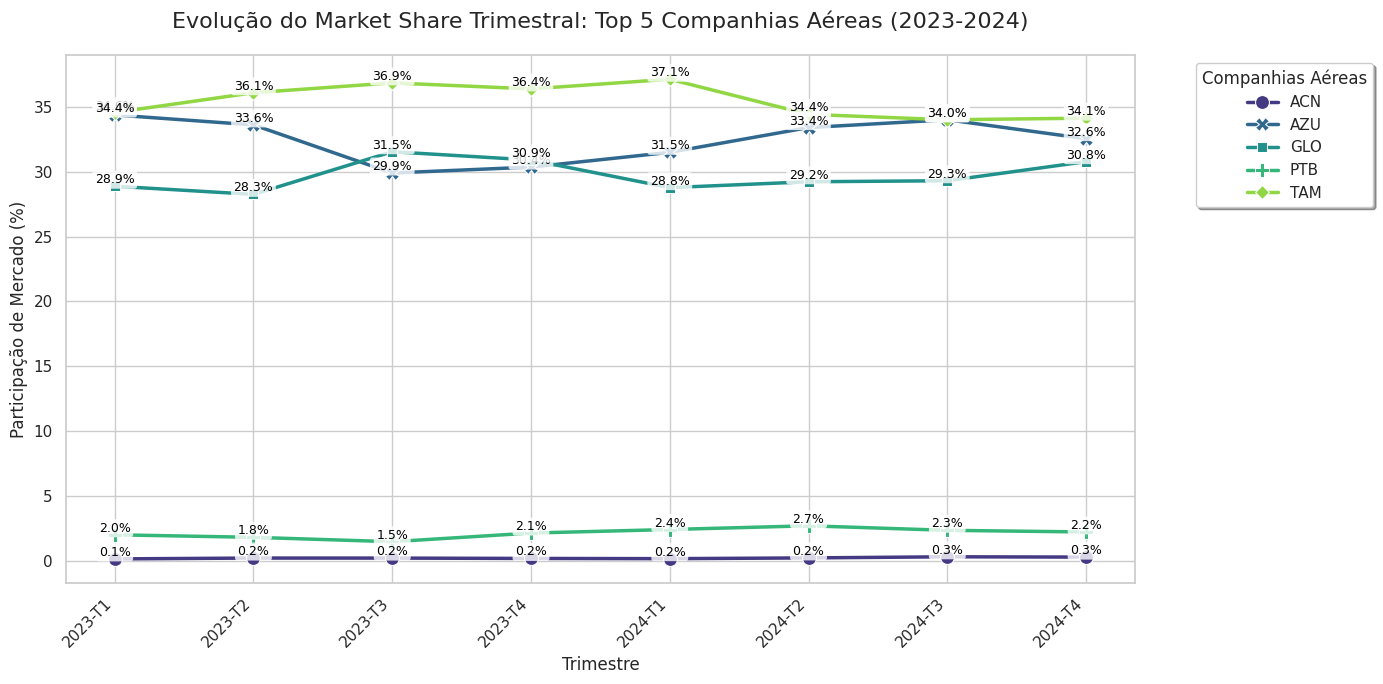

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Configuração do estilo
sns.set_theme(style="whitegrid", palette="pastel")  # Fundo com grid e cores suaves
plt.figure(figsize=(14, 7))

# 2. Criar coluna ANO-TRIMESTRE para o eixo X
df_top5['ANO_TRIMESTRE'] = df_top5['ANO'].astype(str) + '-T' + df_top5['TRIMESTRE'].astype(str)

# 3. Ordenar os dados
df_top5 = df_top5.sort_values(['ANO', 'TRIMESTRE'])

# 4. Plotar o gráfico de linhas com Seaborn
ax = sns.lineplot(
    data=df_top5,
    x='ANO_TRIMESTRE',
    y='MARKET_SHARE',
    hue='EMPRESA_SIGLA',
    style='EMPRESA_SIGLA',  # Estilo diferente para cada linha
    markers=True,           # Marcadores nos pontos
    dashes=False,           # Linhas contínuas
    linewidth=2.5,
    markersize=10,
    palette='viridis'       # Esquema de cores moderno
)

# 5. Personalizações avançadas
plt.title('Evolução do Market Share Trimestral: Top 5 Companhias Aéreas (2023-2024)',
          fontsize=16, pad=20)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Participação de Mercado (%)', fontsize=12)

# Ajustar legenda
ax.legend(
    title='Companhias Aéreas',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True,
    shadow=True
)

# Adicionar valores nos pontos
for empresa in top_5_empresas:
    dados = df_top5[df_top5['EMPRESA_SIGLA'] == empresa]
    for index, row in dados.iterrows():
        ax.text(
            row['ANO_TRIMESTRE'],
            row['MARKET_SHARE'],
            f"{row['MARKET_SHARE']:.1f}%",
            color='black',
            ha='center',
            va='bottom',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
        )

# Rotacionar labels do eixo X
plt.xticks(rotation=45, ha='right')

# Ajustar layout
plt.tight_layout()

# 6. Mostrar o gráfico
plt.show()

<ipython-input-80-ca8115b9b2a4>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_rotas['PERIODO'] = df_top_rotas['ANO'].astype(str) + '-T' + df_top_rotas['TRIMESTRE'].astype(str)


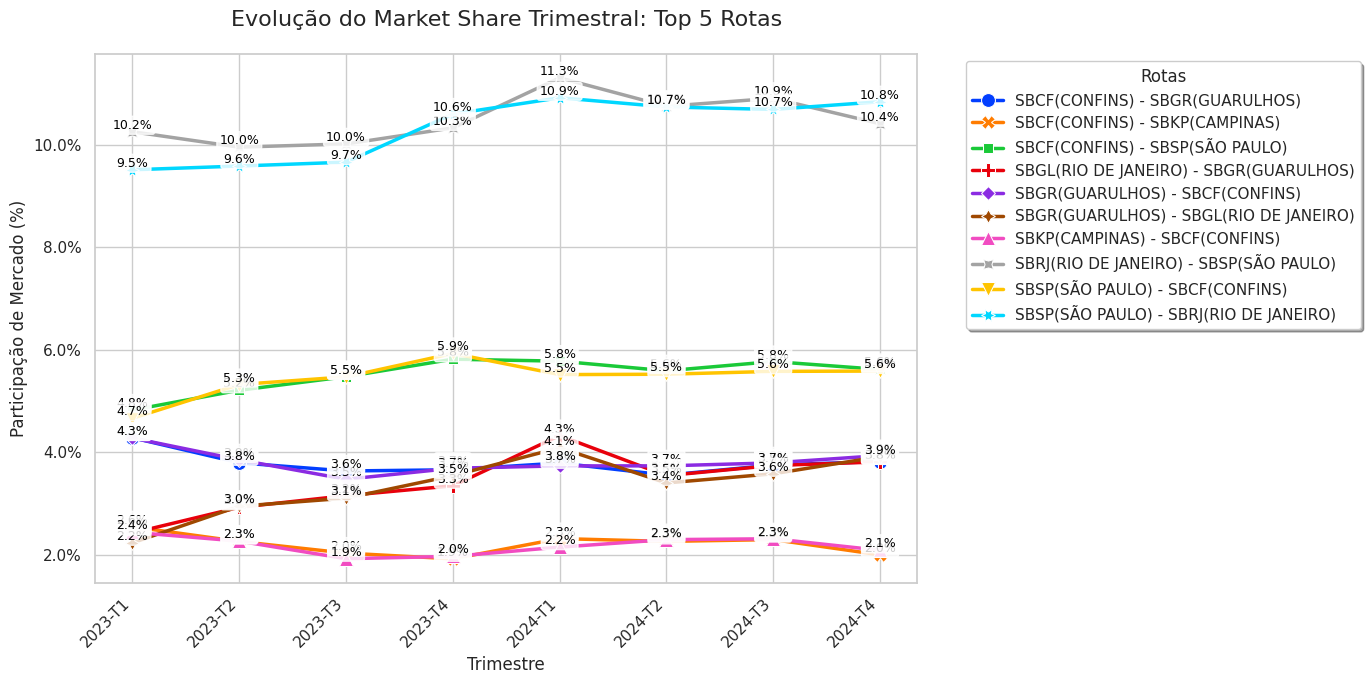

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# 1. Pré-processamento
df['ROTA'] = df['AEROPORTO_DE_ORIGEM_SIGLA'] + '(' + df['AEROPORTO_DE_ORIGEM_NOME'] + ')' + ' - ' + df['AEROPORTO_DE_DESTINO_SIGLA'] + '(' + df['AEROPORTO_DE_DESTINO_NOME'] + ')'
df['TRIMESTRE'] = (df['MES'] - 1) // 3 + 1
df['TOTAL_PASSAGEIROS'] = df['PASSAGEIROS_PAGOS'] + df['PASSAGEIROS_GRATIS']

# 2. Cálculo do market share trimestral
total_trimestral = df.groupby(['ANO', 'TRIMESTRE'])['TOTAL_PASSAGEIROS'].sum().rename('TOTAL_TRIMESTRE')
df_share = (
    df.groupby(['ANO', 'TRIMESTRE', 'ROTA'])['TOTAL_PASSAGEIROS']
    .sum()
    .reset_index()
    .merge(total_trimestral, on=['ANO', 'TRIMESTRE'])
)
df_share['MARKET_SHARE'] = df_share['TOTAL_PASSAGEIROS'] / df_share['TOTAL_TRIMESTRE']

# 3. Selecionar top 5 rotas (baseado no market share médio)
top_rotas = (
    df_share.groupby('ROTA')['MARKET_SHARE']
    .mean()
    .nlargest(10)
    .index.tolist()
)
df_top_rotas = df_share[df_share['ROTA'].isin(top_rotas)]

# 4. Criar coluna ANO-TRIMESTRE para o eixo X
df_top_rotas['PERIODO'] = df_top_rotas['ANO'].astype(str) + '-T' + df_top_rotas['TRIMESTRE'].astype(str)

# 5. Configuração do gráfico
plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid", palette="bright")

# 6. Gráfico de linhas
ax = sns.lineplot(
    data=df_top_rotas,
    x='PERIODO',
    y='MARKET_SHARE',
    hue='ROTA',
    style='ROTA',
    markers=True,
    dashes=False,
    linewidth=2.5,
    markersize=10,
    legend='full'
)

# 7. Personalização
plt.title('Evolução do Market Share Trimestral: Top 5 Rotas', fontsize=16, pad=20)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Participação de Mercado (%)', fontsize=12)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))  # Formato %

# Rotacionar labels do eixo X
plt.xticks(rotation=45, ha='right')

# Ajustar legenda
plt.legend(
    title='Rotas',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True,
    shadow=True
)

# 8. Adicionar valores nos pontos
for rota in top_rotas:
    dados_rota = df_top_rotas[df_top_rotas['ROTA'] == rota]
    for _, row in dados_rota.iterrows():
        ax.text(
            row['PERIODO'],
            row['MARKET_SHARE'],
            f"{row['MARKET_SHARE']:.1%}",
            color='black',
            ha='center',
            va='bottom',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.2')
        )

plt.tight_layout()
plt.show()

<ipython-input-82-3c5a827280b7>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


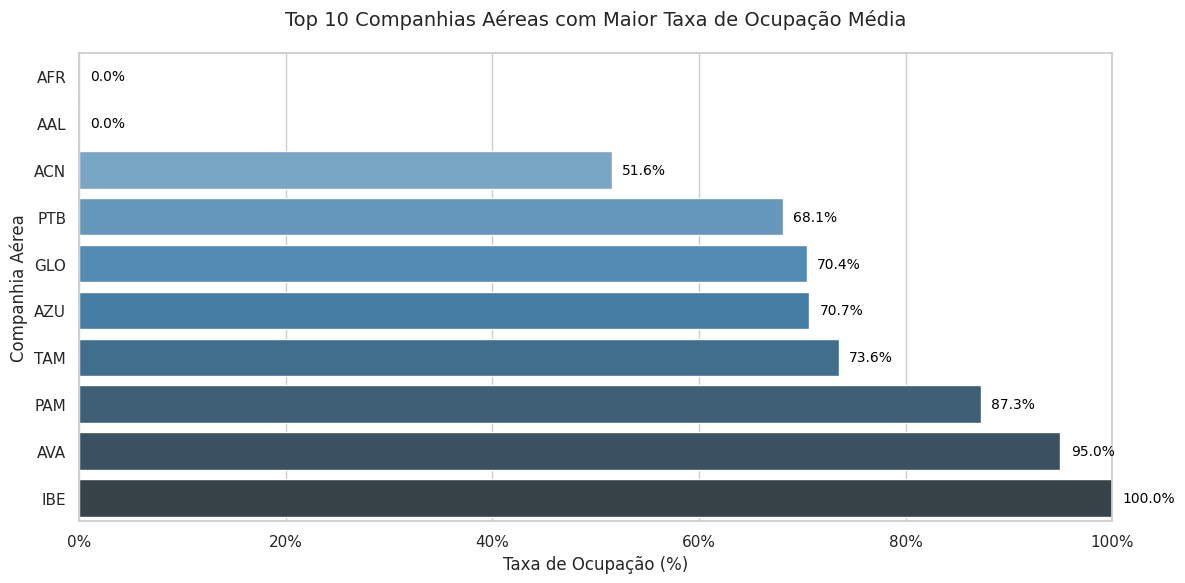

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# 1. Calcular taxa de ocupação
df['TAXA_OCUPACAO'] = (df['PASSAGEIROS_PAGOS'] + df['PASSAGEIROS_GRATIS']) / df['ASSENTOS'] * 100

# 2. Filtrar dados inválidos
df = df[df['ASSENTOS'] > 0]  # Remove voos com assentos zerados

# 3. Calcular média por empresa e selecionar top 10
top10_ocupacao = (
    df.groupby('EMPRESA_SIGLA')['TAXA_OCUPACAO']
    .mean()
    .nlargest(10)
    .sort_values()  # Ordena para melhor visualização no gráfico horizontal
)

# 4. Configuração do gráfico
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
paleta = sns.color_palette("Blues_d", n_colors=10)

# 5. Gráfico de barras horizontais
ax = sns.barplot(
    x=top10_ocupacao.values,
    y=top10_ocupacao.index,
    palette=paleta,
    orient='h'
)

# 6. Personalização
plt.title('Top 10 Companhias Aéreas com Maior Taxa de Ocupação Média', pad=20, fontsize=14)
plt.xlabel('Taxa de Ocupação (%)', fontsize=12)
plt.ylabel('Companhia Aérea', fontsize=12)
plt.xlim(0, 100)  # Limite de 0% a 100%

# Adicionar rótulos de valor
for i, valor in enumerate(top10_ocupacao.values):
    ax.text(
        valor + 1,  # Posição X (valor + pequeno offset)
        i,          # Posição Y (índice da barra)
        f'{valor:.1f}%',
        va='center',
        fontsize=10,
        color='black'
    )

# Formatar eixo X como porcentagem
ax.xaxis.set_major_formatter(PercentFormatter())

# 7. Ajustar layout e mostrar
plt.tight_layout()
plt.show()

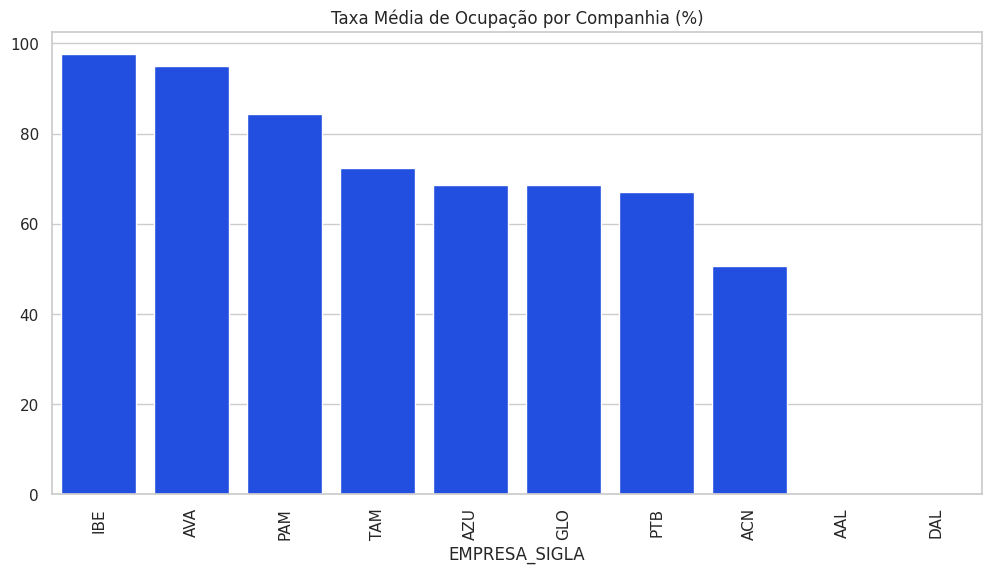

In [ ]:
import numpy as np


df['Taxa_Ocupacao'] = np.where(df['ASSENTOS'] > 0, (df['PASSAGEIROS_PAGOS'] / df['ASSENTOS']) * 100, np.nan)
occupation = df.groupby('EMPRESA_SIGLA')['Taxa_Ocupacao'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=occupation.index, y=occupation.values)
plt.xticks(rotation=90)
plt.title("Taxa Média de Ocupação por Companhia (%)")
plt.show()

<ipython-input-88-d8080bb427fb>:2: RuntimeWarning: invalid value encountered in scalar divide
  lambda x: x['COMBUSTIVEL_LITROS'].sum() / x['DISTANCIA_VOADA_KM'].sum()
<ipython-input-88-d8080bb427fb>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  eficiencia_combustivel = df.groupby('EMPRESA_SIGLA').apply(


Text(0.5, 0, 'Litros/KM')

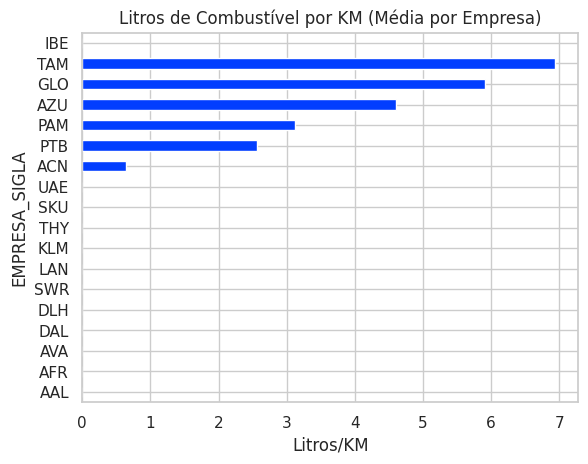

In [ ]:
eficiencia_combustivel = df.groupby('EMPRESA_SIGLA').apply(
    lambda x: x['COMBUSTIVEL_LITROS'].sum() / x['DISTANCIA_VOADA_KM'].sum()
).sort_values()

eficiencia_combustivel.plot(kind='barh', title='Litros de Combustível por KM (Média por Empresa)')
plt.xlabel('Litros/KM')